In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns

In [2]:
df = pd.read_csv("nomiss_scenes_data.csv")
df.head()

,Unnamed: 0,zip,JobsT_1998,ArtsN_1998,ArtsW_1998,JobsN_1998,JobsW_1998,ArtSupport_1998,JobsT_1999,ArtsN_1999,...,esNAICS_INT21,esNAICS_INT22,esNAICS_INT23,esNAICS_INT24,esNAICS_INT25,esNAICS_INT26,esNAICS_INT31,esNAICS_INT32,esNAICS_INT33,esNAICS_INT34
0,502,2568,2098,84,399,2014,1699,315,2246,86,...,413.666667,424.000000,425.50,420.25,384.75,403.333333,415.50,400.75,413.50,408.00
1,20092,75074,25927,716,3443,25211,22484,2727,25482,671,...,1032.000000,1072.333333,1032.25,1025.25,919.25,1021.666667,1002.25,984.75,1042.50,993.00
2,4274,15644,7918,42,395,7876,7523,353,7998,46,...,279.000000,269.333333,278.00,269.25,244.50,259.333333,268.25,253.25,260.50,262.75
3,14647,52732,14434,441,1586,13993,12848,1145,15625,434,...,632.666667,647.000000,637.75,620.00,538.50,596.666667,604.75,573.75,611.25,599.75
4,11588,40503,27591,407,3832,27184,23759,3425,26511,398,...,1243.666667,1283.000000,1250.50,1253.75,1109.75,1203.000000,1216.25,1189.25,1277.75,1211.00


In [3]:
df.describe()

,Unnamed: 0,zip,JobsT_1998,ArtsN_1998,ArtsW_1998,JobsN_1998,JobsW_1998,ArtSupport_1998,JobsT_1999,ArtsN_1999,...,esNAICS_INT21,esNAICS_INT22,esNAICS_INT23,esNAICS_INT24,esNAICS_INT25,esNAICS_INT26,esNAICS_INT31,esNAICS_INT32,esNAICS_INT33,esNAICS_INT34
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,11002.526000,40376.87600,9760.548000,146.836000,1070.118000,9613.712000,8690.430000,923.282000,10025.3400,157.564000,...,450.978667,468.591333,457.433000,450.227000,401.461500,437.738667,439.048500,425.680500,450.742500,435.789500
std,7205.868152,26886.99089,10843.918246,269.616541,1241.585062,10648.865342,9793.330929,1051.694174,11275.2892,284.159009,...,449.223104,498.940719,457.854712,455.620971,407.252933,449.463897,439.574945,437.405321,459.857331,440.442785
min,15.000000,1027.00000,16.000000,3.000000,3.000000,13.000000,13.000000,0.000000,16.0000,3.000000,...,6.000000,6.000000,5.750000,6.000000,5.250000,5.666667,6.250000,6.000000,6.750000,5.750000
25%,5009.750000,18474.75000,2278.250000,20.000000,252.750000,2234.000000,2024.250000,200.750000,2472.5000,21.750000,...,166.750000,168.416667,168.062500,164.500000,143.750000,157.250000,163.312500,151.875000,160.437500,159.750000
50%,9880.500000,34083.50000,6291.000000,59.000000,643.000000,6240.500000,5526.000000,554.000000,6324.0000,62.000000,...,331.333333,337.000000,333.500000,328.875000,289.875000,318.500000,324.125000,309.250000,326.250000,319.875000
75%,16235.750000,58498.00000,13393.500000,160.250000,1496.000000,13119.250000,11796.250000,1270.000000,13737.5000,190.250000,...,610.666667,635.000000,624.375000,616.062500,552.875000,590.250000,600.687500,579.750000,615.500000,594.312500
max,24626.000000,94010.00000,88871.000000,2947.000000,10153.000000,85924.000000,81999.000000,7414.000000,94530.0000,2996.000000,...,3894.333333,4350.000000,4012.250000,4095.000000,3714.000000,3845.000000,3815.500000,3812.250000,3784.500000,3878.500000


In [4]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.head()

,zip,JobsT_1998,ArtsN_1998,ArtsW_1998,JobsN_1998,JobsW_1998,ArtSupport_1998,JobsT_1999,ArtsN_1999,ArtsW_1999,...,esNAICS_INT21,esNAICS_INT22,esNAICS_INT23,esNAICS_INT24,esNAICS_INT25,esNAICS_INT26,esNAICS_INT31,esNAICS_INT32,esNAICS_INT33,esNAICS_INT34
0,2568,2098,84,399,2014,1699,315,2246,86,493,...,413.666667,424.000000,425.50,420.25,384.75,403.333333,415.50,400.75,413.50,408.00
1,75074,25927,716,3443,25211,22484,2727,25482,671,3400,...,1032.000000,1072.333333,1032.25,1025.25,919.25,1021.666667,1002.25,984.75,1042.50,993.00
2,15644,7918,42,395,7876,7523,353,7998,46,476,...,279.000000,269.333333,278.00,269.25,244.50,259.333333,268.25,253.25,260.50,262.75
3,52732,14434,441,1586,13993,12848,1145,15625,434,1476,...,632.666667,647.000000,637.75,620.00,538.50,596.666667,604.75,573.75,611.25,599.75
4,40503,27591,407,3832,27184,23759,3425,26511,398,4289,...,1243.666667,1283.000000,1250.50,1253.75,1109.75,1203.000000,1216.25,1189.25,1277.75,1211.00


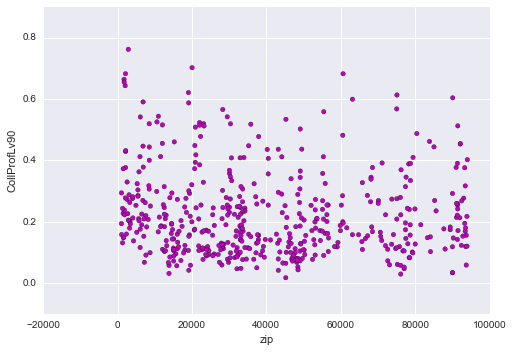

In [7]:
estimator = DBSCAN(eps=1, min_samples=5)
X = df[["JobsT_2014", "ArtsN_2014", "CollProfLv90", "zip", "medhhinc2k"]]
estimator.fit(X)
labels = estimator.labels_
colors = set_colors(labels)
plt.scatter(df['zip'], df['CollProfLv90'], c=colors)
plt.xlabel("zip")
plt.ylabel("CollProfLv90")
plt.show()

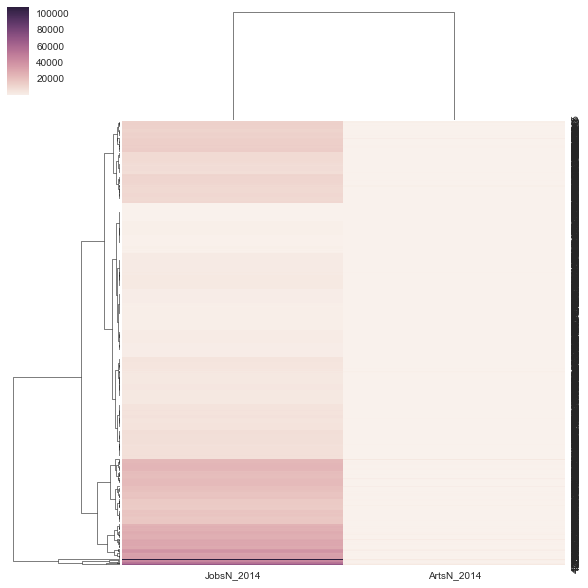

In [8]:
sns.clustermap(df[["JobsN_2014", "ArtsN_2014"]], method="complete")

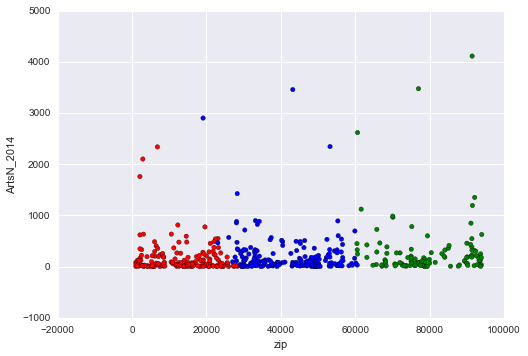

In [9]:
estimator = KMeans(n_clusters=3)
X = df[["JobsT_2014", "ArtsN_2014", "CollProfLv90", "zip"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['zip'], df['ArtsN_2014'], c=colors)
plt.xlabel("zip")
plt.ylabel("ArtsN_2014")
plt.show()

